<a href="https://colab.research.google.com/github/Misudhari/Deep-Learning-Lab/blob/main/Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Dropout

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Ionosphere Data/ionosphere.data", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


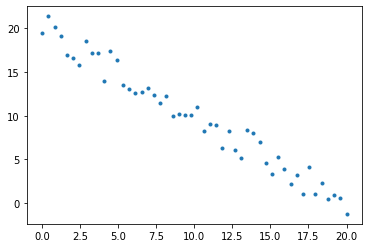

In [21]:
# define a random seed
np.random.seed(42)

# Create rendom points for the x and y asxis from 0 to 20

xs = np.linspace(0 , 20, 50)
ys = np.linspace(20 , 0, 50)

# add some positive and negative noise on the y axis
ys+=np.random.uniform(-2, 2, 50)

# plot the graph
plt.plot(xs, ys, '.')

In [24]:
# , output
from keras.engine import input_layer
# Create the input layer
input_layer = Input(shape=(1,))

# create other hidden layers and the output layer
hidden_1 = Dense(64, activation='relu')(input_layer)
hidden_2 = Dense(32, activation='relu')(hidden_1)
output = Dense(1, activation='linear')(hidden_2)

In [27]:
model = Model(inputs = input_layer, outputs=output)

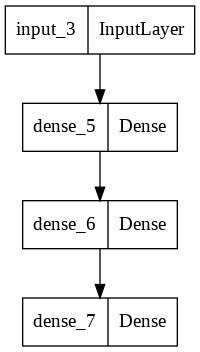

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model)

In [30]:
model.compile(optimizer = 'adam' , loss='mse')
history = model.fit(xs, ys, epochs = 200)

Epoch 1/200
2/2 [==============================] - 1s 14ms/step - loss: 131.2217
Epoch 2/200
2/2 [==============================] - 0s 8ms/step - loss: 127.7157
Epoch 3/200
2/2 [==============================] - 0s 17ms/step - loss: 124.0885
Epoch 4/200
2/2 [==============================] - 0s 8ms/step - loss: 120.8051
Epoch 5/200
2/2 [==============================] - 0s 6ms/step - loss: 117.7592
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 114.8627
Epoch 7/200
2/2 [==============================] - 0s 7ms/step - loss: 112.5646
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 110.3164
Epoch 9/200
2/2 [==============================] - 0s 6ms/step - loss: 108.4385
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 106.6833
Epoch 11/200
2/2 [==============================] - 0s 6ms/step - loss: 105.3592
Epoch 12/200
2/2 [==============================] - 0s 5ms/step - loss: 104.1279
Epoch 13/200
2/2 [=================

Text(0.5, 1.0, 'A plot to show the prediction of the model')

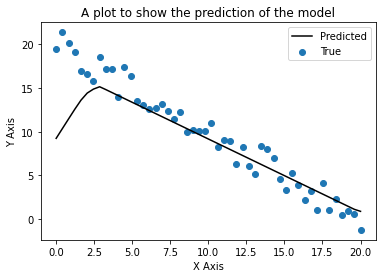

In [33]:
y_pred = model.predict(xs)
plt.plot(xs, y_pred, 'k', label = 'Predicted')
plt.scatter(xs, ys, label = 'True')
plt.legend()
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('A plot to show the prediction of the model')